In [60]:
%matplotlib inline

In [172]:
import requests
import time
import json
from pprint import pprint as pp
import pandas as pd
import os
import os.path
from datetime import datetime
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import datetime as dt
from datetime import date

In [174]:
sold_prop_data = pd.read_csv('weekly_housing_market_data_most_recent.tsv', sep='\t')

In [175]:
sold_prop_data.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,last_updated
0,534,5,"Clayton County, GA",county,2018-03-19,2018-03-25,1 weeks,78.0,0.147059,78.0,...,6.0,NaN,NaN,10.987179,-5.953997,137.0,0.397959,0.027379,-0.004367,2020-11-04 15:41:32
1,1914,5,"Chaves County, NM",county,2018-01-29,2018-02-04,1 weeks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04 15:41:32
2,3028,5,"Westmoreland County, VA",county,2018-01-29,2018-02-04,1 weeks,2.0,-0.666667,2.0,...,-99.5,0.500000,0.333333,70.500000,44.333333,1.0,-0.666667,0.007576,-0.012558,2020-11-04 15:41:32
3,2330,5,"Coos County, OR",county,2017-02-13,2017-02-19,1 weeks,14.0,0.076923,14.0,...,110.5,0.714286,0.483516,19.428571,0.890110,18.0,0.500000,0.038911,-0.004568,2020-11-04 15:41:32
4,2160,5,"Adams County, OH",county,2017-07-24,2017-07-30,1 weeks,3.0,-0.250000,3.0,...,-18.0,0.333333,0.083333,35.333333,1.333333,2.0,0.000000,0.009804,-0.005700,2020-11-04 15:41:32


In [180]:
#Almost 1 million "weeks"
print('Total of unique counties and metro areas:', len(set(sold_prop_data['region_name'])))
sold_prop_data.shape

Total of unique counties and metro areas: 1614


(942959, 78)

<br>

# Philadelphia

In [176]:
pennsylvania = sold_prop_data[[x.split()[1] == 'PA' for x in nd['region_name']]]

In [65]:
column_list = ['period_begin',
 'period_end', 'duration',
 'total_homes_sold',
 'median_sale_price',
 'median_days_to_close',
 'price_drops',
 'percent_active_listings_with_price_drops',
 'pending_sales',
 'total_new_listings',
 'average_new_listings',
 'median_new_listing_price',
 'inventory',
 'total_active_listings',
 'age_of_inventory',
 'homes_delisted',
 'median_active_list_price',
 'avg_offer_to_list',
 'median_days_on_market',
 'months_of_supply',
 'percent_total_price_drops_of_inventory']

In [66]:
philadelphia = pennsylvania[[x.split(',')[0] == 'Philadelphia' for x in pennsylvania['region_name']]]
philadelphia = philadelphia[column_list]
philadelphia = philadelphia[philadelphia['duration'] == '1 weeks']

In [181]:
philadelphia.shape

(200, 21)

In [182]:
#The data begins in 2017
philadelphia.sort_values(by='period_begin')

,period_begin,period_end,duration,total_homes_sold,median_sale_price,median_days_to_close,price_drops,percent_active_listings_with_price_drops,pending_sales,total_new_listings,...,median_new_listing_price,inventory,total_active_listings,age_of_inventory,homes_delisted,median_active_list_price,avg_offer_to_list,median_days_on_market,months_of_supply,percent_total_price_drops_of_inventory
129745,2017-01-02,2017-01-08,1 weeks,247.0,169900.0,33.0,133.0,0.015566,201.0,487.0,...,172500.0,7977.0,8544.0,97.0,258.0,165000.0,0.992592,56.0,34.591093,0.016673
320925,2017-01-09,2017-01-15,1 weeks,342.0,172000.0,35.0,112.0,0.013132,239.0,588.0,...,180000.0,7992.0,8529.0,97.0,136.0,167000.0,0.936397,52.5,24.938596,0.014014
320953,2017-01-16,2017-01-22,1 weeks,344.0,178000.0,34.5,131.0,0.015432,240.0,539.0,...,196700.0,7972.0,8489.0,96.0,135.0,169694.5,0.959082,58.0,24.677326,0.016433
186375,2017-01-23,2017-01-29,1 weeks,364.0,165000.0,37.5,138.0,0.016274,262.0,534.0,...,183450.0,7985.0,8480.0,97.0,107.0,169900.0,0.955076,57.0,23.296703,0.017282
186308,2017-01-30,2017-02-05,1 weeks,457.0,164500.0,33.0,123.0,0.014243,284.0,690.0,...,179400.0,8030.0,8636.0,94.0,154.0,169900.0,0.997149,72.0,18.897155,0.015318
29691,2017-02-06,2017-02-12,1 weeks,349.0,143000.0,35.0,139.0,0.015917,349.0,736.0,...,179900.0,8165.0,8733.0,93.0,82.0,169900.0,0.971853,52.0,25.022923,0.017024
320747,2017-02-13,2017-02-19,1 weeks,384.0,170500.0,35.0,133.0,0.015083,337.0,694.0,...,189900.0,8229.0,8818.0,88.0,98.0,170000.0,0.948641,68.0,22.963542,0.016162
186372,2017-02-20,2017-02-26,1 weeks,363.0,149000.0,31.0,132.0,0.014778,331.0,739.0,...,184900.0,8372.0,8932.0,82.0,84.0,173000.0,0.956365,56.0,24.606061,0.015767
383441,2017-02-27,2017-03-05,1 weeks,547.0,181000.0,33.0,147.0,0.016095,359.0,827.0,...,219000.0,8419.0,9133.0,73.0,176.0,175000.0,0.991076,54.0,16.696527,0.017461
253155,2017-03-06,2017-03-12,1 weeks,371.0,170000.0,32.0,157.0,0.017117,422.0,792.0,...,225000.0,8508.0,9172.0,66.0,104.0,179900.0,0.950176,57.0,24.722372,0.018453


In [96]:
philadelphia.columns

Index(['period_begin', 'period_end', 'duration', 'total_homes_sold',
       'median_sale_price', 'median_days_to_close', 'price_drops',
       'percent_active_listings_with_price_drops', 'pending_sales',
       'total_new_listings', 'average_new_listings',
       'median_new_listing_price', 'inventory', 'total_active_listings',
       'age_of_inventory', 'homes_delisted', 'median_active_list_price',
       'avg_offer_to_list', 'median_days_on_market', 'months_of_supply',
       'percent_total_price_drops_of_inventory'],
      dtype='object')

<br>

# The final dataframe

In [125]:
philadelphia_clean = pd.DataFrame(columns= ['period'] + list(philadelphia.columns)[3:])

for year in ['2019', '2020']:
    for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        
        if (year == '2020' and month == '11'):
            break
            
        else:
            temp_df = philadelphia[philadelphia['period_begin'].str.startswith(year + '-' + month)]
            month_title = year + '-' + month
            total_homes_sold = np.sum(temp_df['total_homes_sold'])
            median_sale_price = np.sum(temp_df['median_sale_price'])
            median_days_to_close = np.average(temp_df['median_days_to_close'])
            price_drops = np.average(temp_df['price_drops'])
            percent_active_listings_with_price_drops = np.average(temp_df['percent_active_listings_with_price_drops'])
            pending_sales = np.average(temp_df['pending_sales'])
            total_new_listings = np.sum(temp_df['total_new_listings'])
            average_new_listings = np.average(temp_df['average_new_listings'])
            median_new_listing_price = np.average(temp_df['median_new_listing_price'])
            inventory = np.average(temp_df['inventory'])
            total_active_listings = np.average(temp_df['total_active_listings'])
            age_of_inventory = np.average(temp_df['age_of_inventory'])
            homes_delisted = np.sum(temp_df['homes_delisted'])
            median_active_list_price = np.average(temp_df['median_active_list_price'])
            avg_offer_to_list = np.average(temp_df['avg_offer_to_list'])
            median_days_on_market = np.average(temp_df['median_days_on_market'])
            months_of_supply = np.average(temp_df['months_of_supply'])
            percent_total_price_drops_of_inventory = np.average(temp_df['percent_total_price_drops_of_inventory'])
            
            row_data = [month_title, total_homes_sold, median_sale_price, median_days_to_close, price_drops, percent_active_listings_with_price_drops, pending_sales, total_new_listings, average_new_listings, median_new_listing_price, inventory, total_active_listings, age_of_inventory, homes_delisted, median_active_list_price, avg_offer_to_list, median_days_on_market, months_of_supply, percent_total_price_drops_of_inventory]

            
            philadelphia_clean.loc[len(philadelphia_clean)] = row_data

In [131]:
def timestamp_f(row):
    ts = dt.datetime.strptime(row['period'], "%Y-%m")
    return ts

In [132]:
philadelphia_clean['timestamp'] = philadelphia_clean.apply (lambda row: timestamp_f(row), axis=1)

In [204]:
#The dataframe with the selected columns and timestamp
philadelphia_clean.head()

,period,total_homes_sold,median_sale_price,median_days_to_close,price_drops,percent_active_listings_with_price_drops,pending_sales,total_new_listings,average_new_listings,median_new_listing_price,inventory,total_active_listings,age_of_inventory,homes_delisted,median_active_list_price,avg_offer_to_list,median_days_on_market,months_of_supply,percent_total_price_drops_of_inventory,timestamp
0,2019-01,1384.0,738775.0,33.250,303.75,0.046135,236.00,2119.0,529.75,198874.875,6131.50,6595.25,77.75,522.0,208950.0,0.960886,47.000,19.848209,0.049578,2019-01-01
1,2019-02,1452.0,739425.0,28.000,314.50,0.045623,294.25,2599.0,649.75,228412.375,6343.75,6892.50,66.00,541.0,218675.0,0.973598,50.875,20.876050,0.049572,2019-02-01
2,2019-03,1782.0,787000.0,26.625,361.75,0.049369,391.25,2943.0,735.75,231112.375,6695.50,7332.00,51.75,494.0,229950.0,0.978069,48.625,17.236471,0.054051,2019-03-01
3,2019-04,2530.0,1053995.0,27.200,435.80,0.055377,468.60,4116.0,823.20,237955.500,7149.80,7864.00,47.20,701.0,241720.0,0.976368,39.600,16.611921,0.060924,2019-04-01
4,2019-05,2353.0,875450.0,29.000,467.25,0.057001,473.00,3037.0,759.25,229474.750,7507.50,8194.75,47.50,482.0,249800.0,0.978131,34.750,14.198941,0.062206,2019-05-01


In [155]:
philadelphia19 = philadelphia_clean[philadelphia_clean['timestamp'] < dt.datetime(2020, 1, 1)].copy()

In [156]:
philadelphia20 = philadelphia_clean[philadelphia_clean['timestamp'] >= dt.datetime(2020, 1, 1)].copy()

<br>

## The total of homes sold

*The graph shows a sharp drop in sales in the first months of the pandemic, as well as a market recovery.*

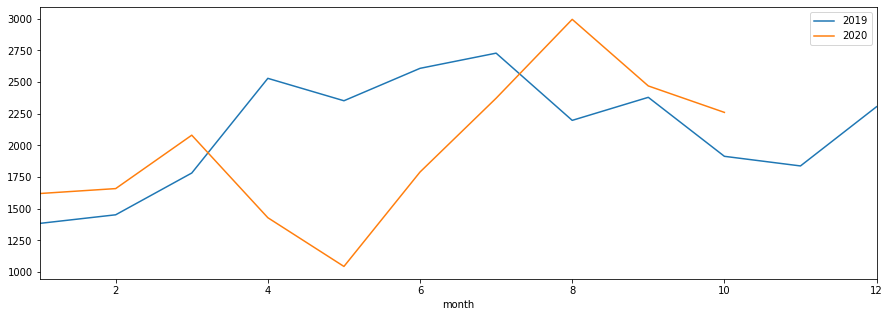

In [167]:
months_19 = [dt.datetime.strptime(row, '%Y-%m').month for row in philadelphia19['period']]
philadelphia19['month'] = months_19

months_20 = [dt.datetime.strptime(row, '%Y-%m').month for row in philadelphia20['period']]
philadelphia20['month'] = months_20

ax = philadelphia19.plot(x='month', y='total_homes_sold', label = '2019', figsize=(15,5))
ax = philadelphia20.plot(x='month', y='total_homes_sold', label = '2020', ax=ax)

## The pending sales

*The graph shows a drop in the number of unfulfilled purchases, following the drop in the number of sales.*

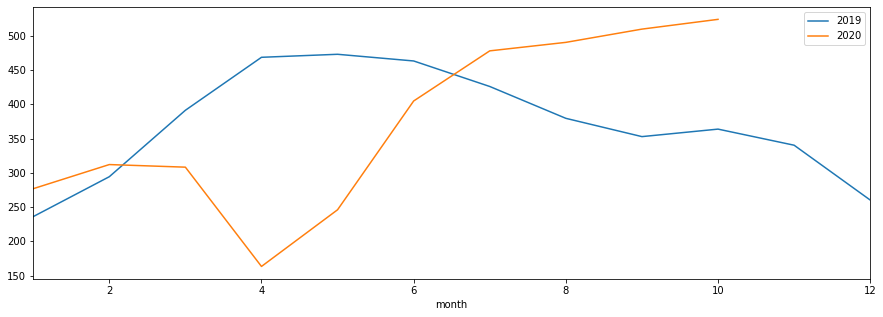

In [168]:
ax = philadelphia19.plot(x='month', y='pending_sales', label = '2019', figsize=(15,5))
ax = philadelphia20.plot(x='month', y='pending_sales', label = '2020', ax=ax)

## The median sale price

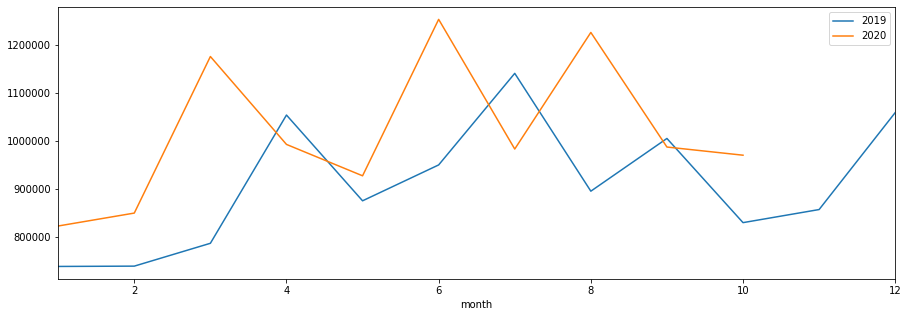

In [166]:
ax = philadelphia19.plot(x='month', y='median_sale_price', label = '2019', figsize=(15,5))
ax = philadelphia20.plot(x='month', y='median_sale_price', label = '2020', ax=ax)

## The median active list price

*The graph shows the median price of homes listed stayed in the same level as 2019, but started to increase after the pandemic begins*

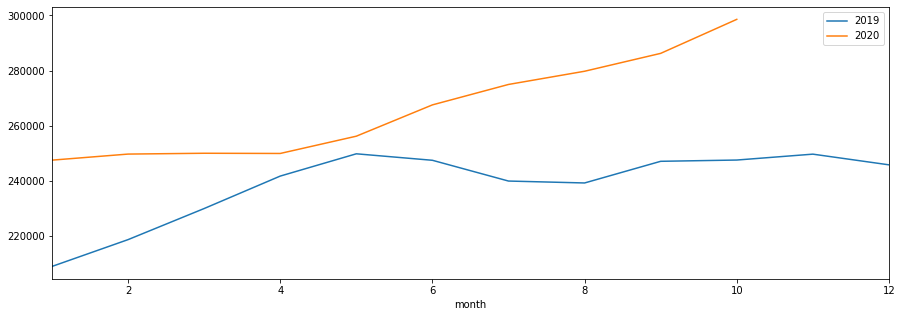

In [171]:
ax = philadelphia19.plot(x='month', y='median_active_list_price', label = '2019', figsize=(15,5))
ax = philadelphia20.plot(x='month', y='median_active_list_price', label = '2020', ax=ax)

## The median days on market

*The graph shows that, unlike 2019, there was an increase in the average selling time of households after the start of the pandemic.*

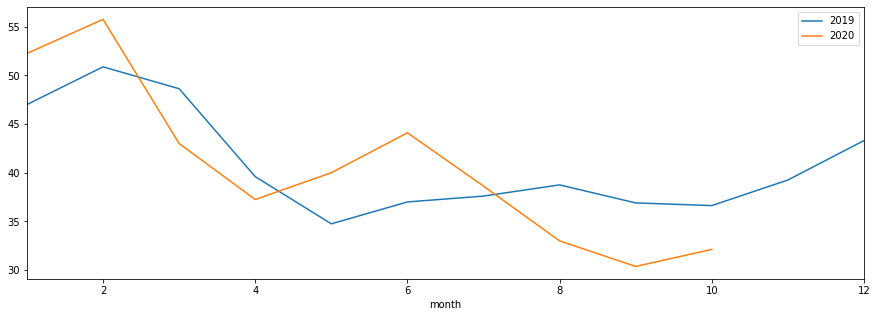

In [169]:
ax = philadelphia19.plot(x='month', y='median_days_on_market', label = '2019', figsize=(15,5))
ax = philadelphia20.plot(x='month', y='median_days_on_market', label = '2020', ax=ax)

<br>

# Some info about the top months in some categories

In [192]:
print('Month with the highest median sale price:')
print(philadelphia_clean.iloc[philadelphia_clean['median_sale_price'].idxmax()]['period'])

Month with the highest median sale price:
2020-06


In [193]:
print('Month with the highest number of days to close the sales:')
print(philadelphia_clean.iloc[philadelphia_clean['median_days_to_close'].idxmax()]['period'])

Month with the highest number of days to close the sales:
2020-05


In [197]:
print('Month with the highest price drops:')
print(philadelphia_clean.iloc[philadelphia_clean['price_drops'].idxmax()]['period'])

Month with the highest price drops:
2019-10


In [198]:
print('Month with the highest inventory:')
print(philadelphia_clean.iloc[philadelphia_clean['inventory'].idxmax()]['period'])

Month with the highest inventory:
2019-05


In [203]:
print('Month with the highest number median days on market:')
print(philadelphia_clean.iloc[philadelphia_clean['median_days_on_market'].idxmax()]['period'])

Month with the highest number median days on market:
2020-02
